In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Regresja liniowa

Aby zrozumieć ideę i poprawnie zaimplementować algorytm regresji liniowej konieczne jest przypomnienie pewnych informacji na temat pochodnych i macierzy.

### Pochodne

Pochodna funkcji jest miarą przyrostu wartości danej funkcji do przyrostu jej argumentów. Do obliczania pochodnych można wykorzystać tablice pochodnych. Poniżej znajduje się animacja przedstawiająca ideę pochodnej.

![ElasticWellwornGoat.gif](attachment:ElasticWellwornGoat.gif "Źródło: https://gfycat.com/elasticwellworngoat")

Dla osób, które potrzebują przypomnienia: [link](https://www.youtube.com/watch?v=N2PpRnFqnqY) oraz [link](https://www.youtube.com/watch?v=Gbtma_UQpro&)

### Pochodne cząstkowe

Załóżmy, że mamy daną funkcję wielu (to znaczy więcej niż jednej) zmiennych, na przykład taką: $f(x,y) = x^2y$. Pochodne cząstkowe po obu jej argumentach obliczamy w następujący sposób:

![pochodna_czastkowa.PNG](attachment:pochodna_czastkowa.PNG "Źródło: khanacademy.org")

W przypadku funkcji zależnej od wielu zmiennych, znajomość pochodnej cząstkowej pozwala nam ocenić, jak szybko zmienia się wartość funkcji gdy manipulujemy wartością tylko jednej zmiennej, a wartości pozostałych zmiennych nie zmieniają się.

### Gradient funkcji i metoda gradientu prostego (gradient descent)

Gradient funkcji rzeczywistej zależnej od wielu zmiennych $f(x, y, \dots)$ oznaczamy przez $\nabla f$. Jest to wektor, który składa się ze wszystkich pochodnych cząstkowych pierwszego stopnia tej funkcji.  

Gradient funkcji ma jedną bardzo ważną własność, która jest wykorzystywana w optymalizacji funkcji. **Gradient funkcji $f$ w punkcie $(x_0, y_0)$ wskazuje kierunek, w którym funkcja $f$ rośnie najszybciej.** Co więcej, długość wektora $\nabla f(x_0,y_0)$ informuje ile wynosi nachylenie w tym kierunku.  

Wyobraźmy sobie sytuację, że stoimy na dużej górze. Chcemy jak najszybciej zejść na dół tej góry. Aby tego dokonać, musimy znaleźć zbocze, które jest najbardziej strome (pomijamy założenie o zdrowym rozsądku). Gdyby górę opisać za pomocą funkcji, to obliczając gradient w punkcie, w którym się znajdujemy, dowiedzielibyśmy się który kierunek obrać, żeby dojść na najbardziej strome zbocze.  

Algorytm gradientu prostego jest metodą optymalizacyjną, której celem jest znalezienie minimum funkcji. Polega on na iteracyjnym wyliczaniu gradientu w obecnym punkcie i przemieszczaniu się w wyznaczonym kierunku. W naszym przypadku będziemy wykorzystywać ten algorytm do znalezienia minimum funkcji błędu regresji.

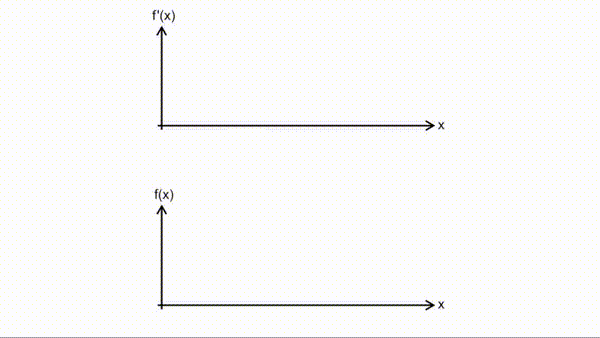
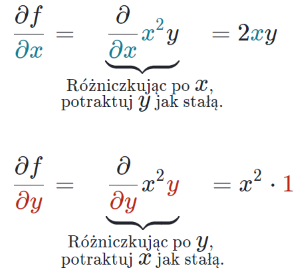

### Macierze

Macierz jest to układ liczb zapisany w prostokątnej tablicy. Dzięki macierzom, w łatwiejszy sposób można zapisać wiele powtarzających się układów równań. Macierz składa się z wierszy i kolumn. Jeśli liczba któregoś wymiaru jest równa jeden, wtedy macierz nazywamy wektorem. Informacje o macierzy i jej wymiarach zapisujemy w następujący sposób:

\begin{equation}
    A_{w \times k}
\end{equation}

co oznacza macierz A o wymiarach w na k, to znaczy liczbie wierszy w i liczbie kolumn k.

Przykładowa macierz:

$$
B = 
\begin{vmatrix}
1&3&6\\
5&2&3\\
\end{vmatrix}
$$

Macierz $B_{2 \times 3}$ - macierz o wymiarach 2 wiersze i 3 kolumny.


### Operacje na macierzach

Na macierzach można wykonywać następujące operacje operacje.

#### Dodawanie i odejmowanie macierzy

Dodawanie (i analogicznie odejmowanie) dwóch macierzy jest możliwe, jeśli mają takie same wymiary. Wynikowa macierz C będąca sumą macierzy A i B zawiera sumę odpowiadających sobie elementów macierzy A i B.

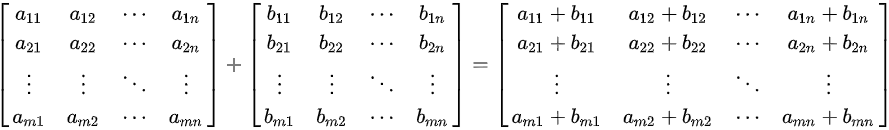

#### Mnożenie macierzy przez skalar (liczbę)

Pomnożenie macierzy A przez skalar r daje w wyniku macierz A w której każdy jej element został pomnożony przez r.

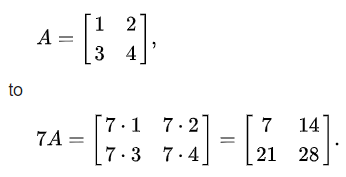

#### Mnożenie macierzy przez macierz

Mnożenie macierzy A i B jest możliwe jeśli macierz A ma tyle samo kolumn co macierz B ma wierszy.

\begin{equation}
    A_{w_1 \times k_1} \cdot B_{w_2 \times k_2} = C_{w_1 \times k_2},
\end{equation}

gdzie $k_1 = w_2$  

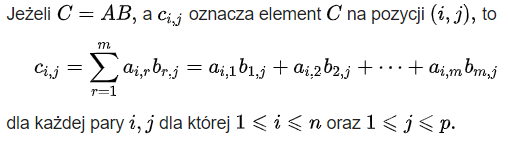

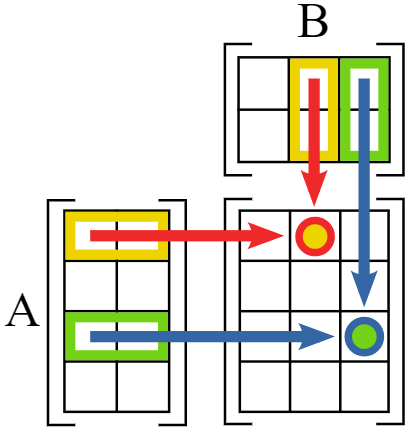

#### Transponowanie macierzy

Operacja, która polega na zamianie wierszy z kolumnami.

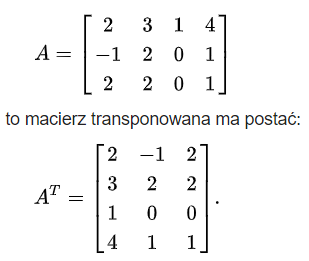

### Regresja liniowa

Regresja w ogólnym przypadku szuka związku pomiędzy zmiennymi. Przykładowo, możemy obserwować zmienną w relacji do drugiej (np. zależność stażu pracy od wysokości wynagrodzenia, wzrost temperatury przy wzroście oporu przewodnika). Zmienne te nazywamy odpowiednio zmiennymi niezależnymi ($x$) i zmiennymi zależnymi ($y$).  

Badane zależności możemy podzielić na liniowe i nieliniowe, oraz zależne od jednej, bądź większej ilości zmiennych (regresja wieloraka - więcej niż jedna zmienna niezależna). Zadaniem regresji jest odnalezienie takiej funkcji, która w możliwie najlepszym stopniu pokaże zależność zmiennej zależnej (czyli tą, którą próbujemy przewidzieć - $y$) od zmiennej (lub zmiennych) niezależnych ($x$).  

Poniżej znajduje się przykład regresji liniowej prostej, która opisuje zależność pomiędzy latami doświadczenia zawodowego, a wynagrodzeniem. Widać, że zależność ta jest praktycznie liniowa i wraz ze wzrostem lat doświadczeń, proporcjonalnie rośnie również wynagrodzenie. Przynajmniej w według fikcyjnych danych :)

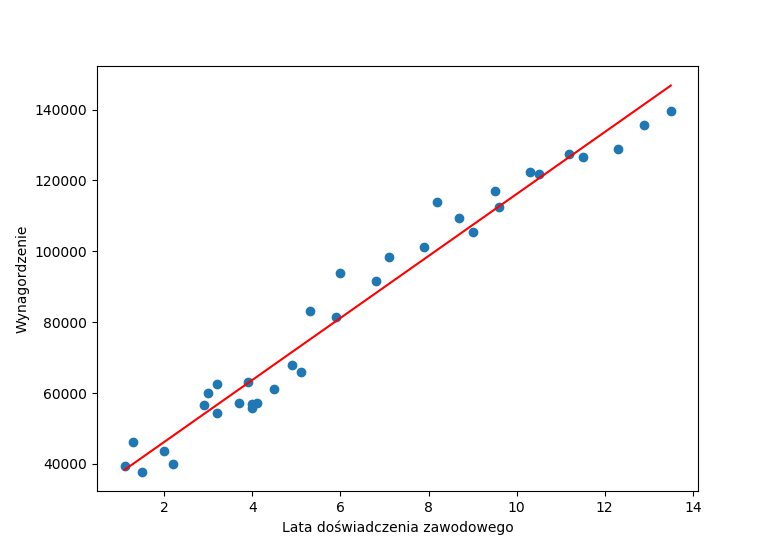

<div class="alert alert-block alert-info">
Przed przejściem do opisu modelu, warto zebrać i wyjaśnić stosowaną notację. 
    
* $x_j^{(i)}$ - wartość cechy $j$ dla $i$-tej obserwacji, czyli $x_{2}^{(5)}$ to druga cecha piątej obserwacji,
* $x^{(i)}$ - wektor $i$-tej obserwacji z wszystkimi cechami, czyli $x^{(4)}$ to czwarta obserwacja,
* $m$ - liczba wszystkich obserwacji,
* $n$ - liczba wszystkich cech.
</div>


Ogólny wzór na regresję przyjmuję postać:

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + ... + \beta_{n}x_{n} + \epsilon
\end{equation}

gdzie:

- $\beta_{0}, ..., \beta_{n}$ - współczynniki regresji,
- $\epsilon$ - błąd losowy,
- $x_{1}, ..., x_{n}$ - wartości cechy n.

Zapis w postaci macierzowej:

\begin{equation}
    Y = X\beta + \epsilon
    \label{eq: macierzowo regresja}
\end{equation}

\begin{equation}
    Y = 
\begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1n}\\
x_{20} & x_{21} & \ldots & x_{2n}\\
\vdots & \vdots & \ddots & \vdots \\
x_{m0} & x_{m1} & \ldots & x_{mn}\\
\end{bmatrix}
\begin{bmatrix}
\beta_{0}\\
\beta_{1}\\
\vdots\\
\beta_{n}\\\\
\end{bmatrix}
+
\epsilon
\end{equation}

gdzie:

- $\beta$ - wektor współczynników regresji,
- X - macierz zawierająca wartości cech dla wszystkich obserwacji,
- Y - wektor predykcji.

Uwaga:
Wektor $\beta$ ma wymiary wymiary $n + 1 \times 1$ ($n + 1$ ponieważ jest $n$ cech i wyraz wolny $\beta_{0}$). Z tego względu, aby możliwe było pomnożenie macierzy i wektora, należy dodać kolumnę z wartościami $1$ na początek macierzy. W pierwszej kolumnie macierzy elementy $x_{00} \ldots x_{m0}$ mają zawsze wartość $1$. Inaczej mówiąc, każda próbka $x^{(i)}$ jako pierwszą cechę ma wartość $1$: $x_{0}^{(1)}, \ldots, x_{0}^{(m)} = 1$

Macierz $X$ ma wymiary $m \times n+1$, a $\beta$ jest wektorem o wymiarach $n+1 \times 1$, więc pomnożenie macierzy jest możliwe. Wynikiem będzie wektor predykcji o wymiarach $m \times 1$.  

<br />
<br />

Zadaniem regresji liniowej jest stworzenie takiej prostej (hiperpłaszczyzny), która będzie możliwie najbliżej wszystkich punktów. Sprowadza się to do odnalezienia takiego wektora współczynników $\beta$, z których powstała prosta (hiperpłaszczyzna) będzie miała możliwie najmniejszy błąd.  

Aby wskazać najlepsze współczynniki regresji, jako funkcję błędu zastosujemy sumę kwadratów reszt regresji ($SSR$):

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(predykcja^{(i)} - prawdziwa\_wartosc^{(i)})^2
\end{equation}

$predykcja^{(i)}$, to wartość przypisana przez funkcję regresji dla $i$-tej obserwacji.

$prawdziwa\_wartosc^{(i)}$, to wartość zmiennej zależnej ($y$) dla $i$-tej obserwacji.

Finalnie funkcja $SSR$ przyjmuje postać: 
\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

gdzie:
$f(x^{(i)}) = \beta_{0} + \beta_{1}x_{1}^{(i)} + ... + \beta_{n}x_{n}^{(i)}$.  

Wartość błędu, czyli różnicy pomiędzy predykcją, a prawdziwą wartością, zostaje podniesiona do potęgi, aby spowodować większy wpływ na ostateczny kształt funkcji regresji tych punktów, dla których błąd jest większy (należy bardziej karać mocniej odstające wartości). Dodatkowo, informacja o znaku błędu również nie jest potrzebna. Nie interesuje nas, czy estymowana wartość była większa, czy mniejsza od rzeczywistej wartości, tylko jak duża była ta różnica (jednak ze względu na pierwszy argument jest to potęga parzysta, a nie wartość bezwzględna).  

Celem algorytmu jest odnalezienie najlepiej dopasowanych parametrów modelu ($\beta$), co sprowadza się do minimalizacji funkcji błędu. W tym celu użyty zostanie algorytm gradientu prostego. W celu obliczenia gradientu należy:

- zainicjalizować wektor współczynników $\beta$ losowymi wartościami,
- następnie należy obliczyć jak funkcja błędu zmienia się w stosunku do zmiany parametrów $\beta$. W tym celu należy obliczyć pochodne cząstkowe funkcji kosztu względem parametrów $\beta_{0}, \beta_{1}, ... \beta_{n}$:
    
    \begin{equation}
        \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
    \end{equation}

    \begin{equation}
        \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
    \end{equation}

    Pochodna cząstkowa względem dowolnego parametru przybierze postać:

    \begin{equation}
        \frac{\partial SSR}{\partial \beta_{j}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{j}^{(i)}
    \end{equation}
    
    Pochodne cząstkowe w wersji macierzowej możemy obliczyć w jednym równaniu: 
    
    \begin{equation}
        \begin{bmatrix}
        \frac{\partial SSR}{\partial \beta_{0}} \\
        \frac{\partial SSR}{\partial \beta_{1}} \\
        \vdots\\
        \frac{\partial SSR}{\partial \beta_{n}} \\
        \end{bmatrix}
        =
        \frac{1}{n} X ^{T}(f(X) - Y)
        \label{eq: gradient pochodnych czastkowych}
    \end{equation}
    
    Warto zauważyć, że $f(X) - Y$ to operacja na wektorach, a nie na skalarach. Funkcja $f(X)$ zwróci wektor predykcji dla wszystkich obserwacji (czyli naszej macierzy $X$). $Y$, to wektor z prawdziwymi wartościami zmiennej objaśnianej. 

    Jest tutaj jeszcze jedna ważna właściwość mnożenia macierzy, która może być niezrozumiała na początku implementacji. Zgodnie ze wzorem 8 należy wykonać sumowanie po wszystkich obserwacjach, jednak mnożenie transponowanej macierzy obserwacji załatwia sumowanie wartości wszystkich obserwacji (warto sobie to rozpisać).
    
- po obliczeniu pochodnych cząstkowych należy zaktualizować uprzednio losowo wybrane parametry macierzy $\beta$:

    \begin{equation}
        \beta_{0} = \beta_{0} - \frac{\alpha}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})
    \end{equation}
    
    \begin{equation}
        \beta_{1} = \beta_{1} - \frac{\alpha}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
    \end{equation}
    
    \begin{equation}
        \beta_{j} = \beta_{j} - \frac{\alpha}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})x_{j}^{(i)}
    \end{equation}
    
    w postaci macierzowej:
    
    \begin{equation}
        \begin{bmatrix}
            \beta_{0}\\
            \beta_{1}\\
            \vdots\\
            \beta_{n}\\
        \end{bmatrix}
         =
         \begin{bmatrix}
            \beta_{0}\\
            \beta_{1}\\
            \vdots\\
            \beta_{n}\\\\
        \end{bmatrix}
        -
        \alpha
        \begin{bmatrix}
        \frac{\partial SSR}{\partial \beta_{0}} \\
        \frac{\partial SSR}{\partial \beta_{1}} \\
        \vdots\\
        \frac{\partial SSR}{\partial \beta_{n}} \\
        \end{bmatrix}
    \end{equation}
    
    gdzie $\alpha$ oznacza współczynnik uczenia i przybiera wartość z przedziału (0,1)